In [70]:
# import all needed packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import chart_studio as py
import plotly.express as px
import openpyxl
import geopandas
import statistics

In [2]:
# import the WBL index
wbl_df = pd.read_excel("/Users/izzyabate/Desktop/Research Sanchari/WBL Panel.xlsx")

# What is the index?
WBL index  measures the extent of legal equality women have with men in various dimensions of their lives (including marriage, mobility, work, pay etc.)

In [7]:
# Understanding the data 
print(wbl_df.columns)
print(wbl_df.describe())

Index(['Economy', 'Economy Code', 'ISO Code', 'Region', 'Income Group',
       'Report Year', 'WBL INDEX', 'MOBILITY',
       'Can a woman choose where to live in the same way as a man?',
       'Can a woman travel outside her home in the same way as a man?',
       'Can a woman apply for a passport in the same way as a man?',
       'Can a woman travel outside the country in the same way as a man?',
       'WORKPLACE', 'Can a woman get a job in the same way as a man?',
       'Does the law prohibit discrimination in employment based on gender?',
       'Is there legislation on sexual harassment in employment?',
       'Are there criminal penalties or civil remedies for sexual harassment in employment?',
       'PAY',
       'Does the law mandate equal remuneration for work of equal value?',
       'Can a woman work at night in the same way as a man?',
       'Can a woman work in a job deemed dangerous in the same way as a man?',
       'Can a woman work in an industrial job in the sam

# The geographical distribution of the average WBL index
- Regions: High income: OECD, Middle East & North Africa, Sub-Saharan Africa, East Asia & Pacific, Europe & Central Asia, Latin America & Caribbean, South Asia

In [60]:
# Subset data frame for region and WBL index
geo_index = wbl_df[['Region', 'WBL INDEX']]
geo_index.head()

# Find the average WBL index by Region
avgWBL = geo_index.groupby(['Region']).mean()

TypeError: 'Index' object is not callable

In [40]:
# Show the geographical distribution of the average WBL index
fig = px.bar(avgWBL,
             labels={'value':'Average WBL Index'}, title='Geographical Distribution of the Average WBL Index')
fig.update_traces(marker_color='hotpink')
fig.show()

## How this distribution has changed over decades ?

In [83]:
# Create an index including: Region, WBL Index, Report Year
year_index = wbl_df[['Region', 'WBL INDEX', 'Report Year']]

# Create a pivot table showing the WBL index for each region by year
year_index1 = pd.pivot_table(year_index, index=['Report Year'], columns=['Region'], values=['WBL INDEX'])
year_index1

WBL INDEX                                          \
Region      East Asia & Pacific Europe & Central Asia High income: OECD   
Report Year                                                               
1971                     47.475             57.201087         55.055147   
1972                     47.575             56.059783         55.000000   
1973                     47.825             58.233696         55.606618   
1974                     48.650             58.777174         56.930147   
1975                     49.575             59.293478         57.426471   
1976                     49.575             59.293478         58.970588   
1977                     49.700             59.293478         59.944853   
1978                     50.200             59.293478         61.360294   
1979                     50.450             59.293478         62.830882   
1980                     50.575             59.293478         63.566176   
1981                     50.575             59.157609         64.099265   
1982                     50.825             59.293478         64.761029   
1983                     51.075             59.293478         65.496324   
1984                     51.075             59.293478         66.121324   
1985                     51.200             59.293478         66.544118   
1986                     51.425             59.293478         67.518382   
1987                     51.625             60.027174         68.106618   
1988                     51.825             60.271739         68.713235   
1989                     52.700             60.244565         69.191176   
1990                     53.050             60.244565         69.705882   
1991                     53.150             60.516304         71.029412   
1992                     53.800             61.277174         71.580882   
1993                     53.925             61.820652         72.077206   
1994                     53.925             62.201087         72.665441   
1995                     54.375             62.826087         73.382353   
1996                     55.150             63.614130         74.411765   
1997                     55.775             65.027174         75.882353   
1998                     56.350             65.951087         76.562500   
1999                     56.775             66.222826         77.205882   
2000                     57.500             66.766304         78.253676   
2001                     58.075             67.608696         79.209559   
2002                     58.075             67.853261         79.724265   
2003                     59.125             69.429348         81.176471   
2004                     59.700             72.010870         82.389706   
2005                     60.425             73.423913         83.988971   
2006                     60.625             75.516304         84.834559   
2007                     60.950             76.766304         86.268382   
2008                     61.450             77.445652         87.573529   
2009                     62.725             78.315217         88.731618   
2010                     63.250             79.130435         90.220588   
2011                     63.850             80.326087         90.992647   
2012                     64.675             80.760870         92.022059   
2013                     66.400             80.869565         92.500000   
2014                     67.875             81.385870         92.720588   
2015                     68.725             81.657609         93.143382   
2016                     69.275             81.739130         93.437500   
2017                     69.975             81.983696         93.786765   
2018                     70.175             82.364130         94.136029   
2019                     70.500             82.717391         94.705882   
2020                     70.825             83.125000         94.779412   
2021                     71.450             83.

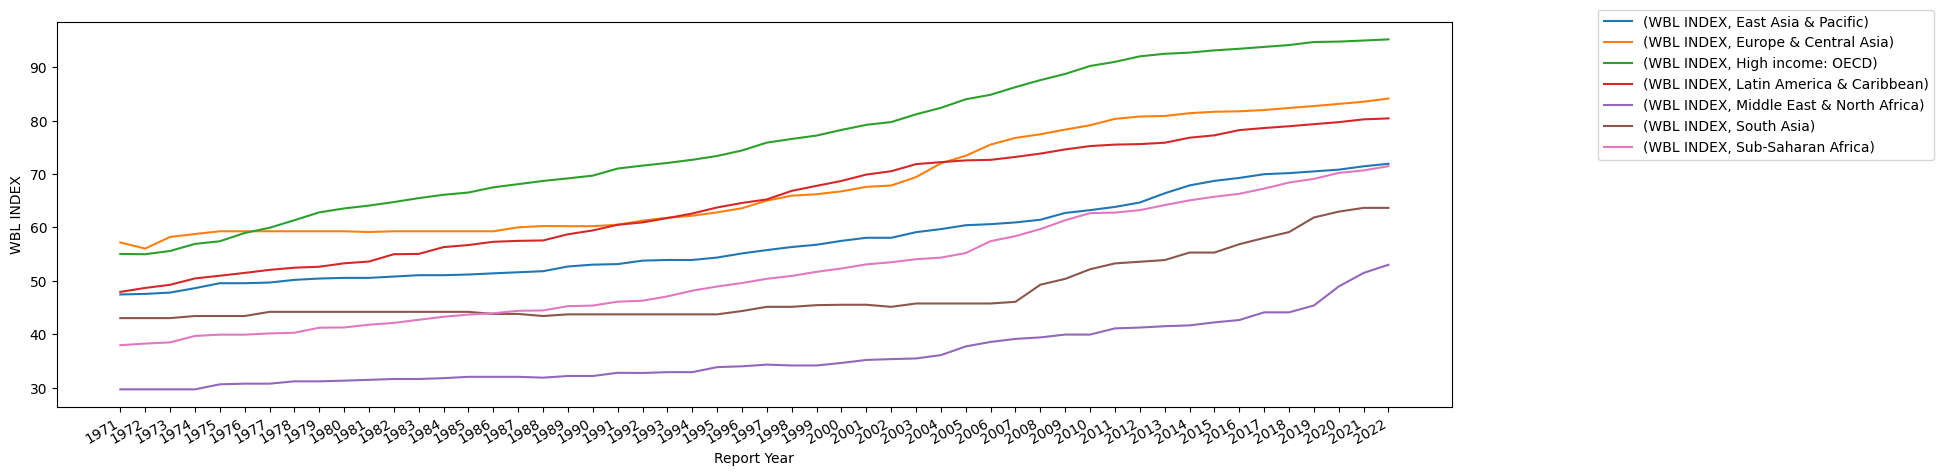

In [101]:
# Create a multiple line plot showing the distribution over time
ax = year_index1.plot(xticks=year_index1.index, ylabel='WBL INDEX',  figsize=(18,5))
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()